In [85]:
########################
## EE546 Winter 2021
## Example from Rosen '65
## https://www.jstor.org/stable/1911749?seq=1#metadata_info_tab_contents
## By: Evan Faulkner, Lillian Ratliff
###

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as la
fs=20
lw=4

## Example in Fig 2 of Rosen '65
The game is defined by the utility functions
$$\phi_1(x_1,x_2)=-\frac{1}{2}x_1^2+x_1x_2$$
$$\phi_2(x_1,x_2)=-x_2^2-x_1x_2$$
where $h_1(x_1,x_2)=x_1\geq 0$, $h_2(x_1,x_2)=x_2\geq 0$, and $h_3(x_1,x_2)=x_1+x_2-1\geq 0$

Rosen shows that the equilibrium depends on the choice of $r$ as follows:
$$x_1^\ast=\left\{\begin{array}{cc} 1, & \ r_1\leq r_2\\
\frac{r_1+2r_2}{2r_1+r_2}, & \ r_1>r_2\end{array}\right.$$
and
$$x_2^\ast=1-x_1^\ast$$

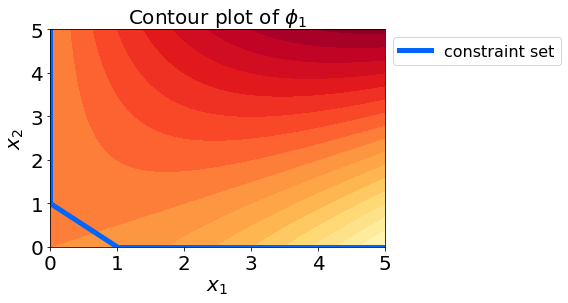

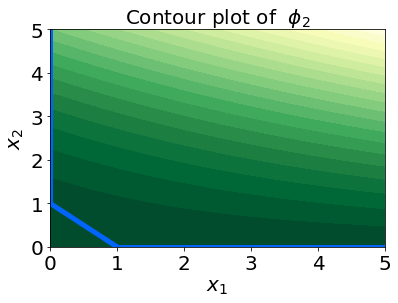

In [32]:


def phi_1(x_1,x_2):
    return -(1/2)*x_1**2+x_1*x_2

def phi_2(x_1,x_2):
    return -x_2**2-x_1*x_2

delta = 0.01
x = np.arange(0, 5, delta)
y = np.arange(0, 5, delta)
X, Y = np.meshgrid(x, y)
Z_1 = phi_1(X,Y)
Z_2 = phi_2(X,Y)

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z_1, 20,cmap=plt.cm.YlOrRd)
plt.plot([0,1],[1,0],color='xkcd:Bright Blue', linewidth=lw+1, label='constraint set')
plt.plot([1,5],[0,0],color='xkcd:Bright Blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright Blue', linewidth=lw+1)
plt.xlim([0,5])
plt.ylim([0,5])
plt.tick_params(labelsize=fs)
ax.set_title(r'Contour plot of $\phi_1$', fontsize=fs)
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.legend(loc=0, bbox_to_anchor=(1.55,1), fontsize=fs-4)
plt.show()

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z_2, 20,cmap=plt.cm.YlGn)
plt.plot([0,1],[1,0],color='xkcd:Bright Blue', linewidth=lw+1, label='constraint set')
plt.plot([1,5],[0,0],color='xkcd:Bright Blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright Blue', linewidth=lw+1)
plt.xlim([0,5])
plt.ylim([0,5])
ax.set_title(r'Contour plot of  $\phi_2$', fontsize=fs)
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.show()

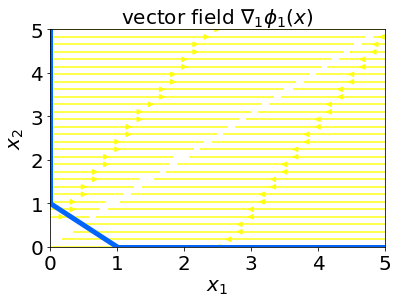

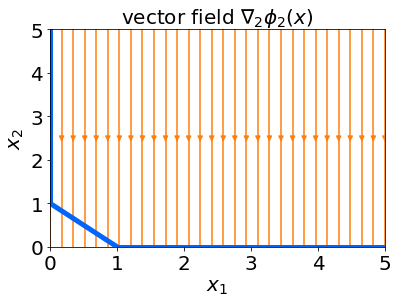

In [49]:
def grad_phi_1(x_1,x_2):
    return x_2-x_1

def grad_phi_2(x_1,x_2):
    return -2*x_2-x_1

u = np.arange(0, 5.5, 0.5)
v = np.arange(0, 5.5, 0.5)
U, V = np.meshgrid(u, v)

W_1 = grad_phi_1(U,V)
W_2 = grad_phi_2(U,V)

fig, ax = plt.subplots()
q = ax.streamplot(U, V, W_1, np.zeros((11,11)), color='xkcd:yellow')
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlim([0,5])
plt.ylim([0,5])
plt.title(r'vector field $\nabla_1 \phi_1(x)$', fontsize=fs)
plt.show()

fig, ax = plt.subplots()
q = ax.streamplot(U, V, np.zeros((11,11)), W_2, color='tab:orange')
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.title(r'vector field $\nabla_2 \phi_2(x)$', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.show()

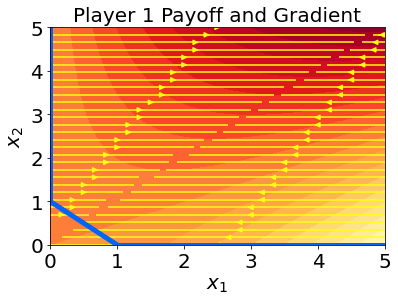

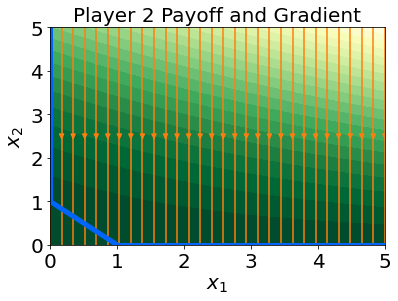

In [52]:
fig, ax = plt.subplots()
q = ax.streamplot(U, V, W_1, np.zeros((11,11)), color='xkcd:yellow')
CS = ax.contourf(X, Y, Z_1, 20,cmap=plt.cm.YlOrRd)
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.title('Player 1 Payoff and Gradient', fontsize=fs)
plt.xlim([0,5])
plt.ylim([0,5])
plt.tick_params(labelsize=fs)
plt.show()

fig, ax = plt.subplots()
q = ax.streamplot(U, V, np.zeros((11,11)), W_2, color='tab:orange')
CS = ax.contourf(X, Y, Z_2, 20, cmap=plt.cm.YlGn)
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.title('Player 2 Payoff and Gradient', fontsize=fs)
plt.xlim([0,5])
plt.ylim([0,5])
plt.tick_params(labelsize=fs)
plt.show()

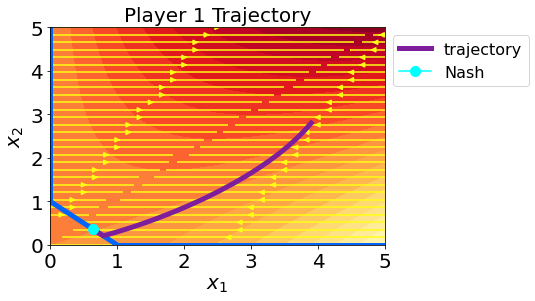

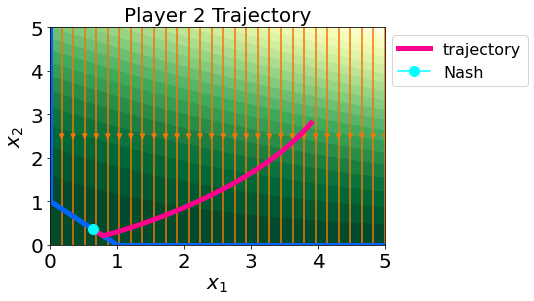

In [79]:
init = [4,3]
delta = 1e-6
x_old = [0,0]
x_new = init
x_k = []

r = [10,2]

tau = [1e-2,1e-2]

while True:
    if np.abs(x_new[0]-x_old[0]) > delta or np.abs(x_new[1]-x_old[1]) > delta:
        x_old = x_new.copy()
        x_new[0] = x_old[0] + tau[0]*r[0]*grad_phi_1(x_old[0],x_old[1])
        x_new[1] = x_old[1] + tau[1]*r[1]*grad_phi_2(x_old[0],x_old[1])
        if x_new[0]<0:
            x_new[0] = 0
        if x_new[1]<0:
            x_new[1] = 0
        if x_new[0]+x_new[1]-1<0:
            a = x_new[0]+x_new[1]-1
            x_new[0]=x_new[0]-a/2
            x_new[1]=x_new[1]-a/2
        x_k.append(x_new.copy())
    else:
        break
        
fig, ax = plt.subplots()
q = ax.streamplot(U, V, W_1, np.zeros((11,11)), color='xkcd:yellow')
CS = ax.contourf(X, Y, Z_1, 20,cmap=plt.cm.YlOrRd)
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.plot([x[0] for x in x_k], [x[1] for x in x_k],color="xkcd:purple", linewidth=lw+1, label='trajectory')
plt.plot([x_new[0]], [x_new[1]], marker='o', markersize=10, color="xkcd:cyan", label="Nash")
plt.legend(loc=0, bbox_to_anchor=(1.0,1), fontsize=fs-4)
plt.title('Player 1 Trajectory', fontsize=fs)
plt.xlim([0,5])
plt.ylim([0,5])
plt.tick_params(labelsize=fs)
plt.show()

fig, ax = plt.subplots()
q = ax.streamplot(U, V, np.zeros((11,11)), W_2, color='xkcd:orange')
CS = ax.contourf(X, Y, Z_2, 20,cmap=plt.cm.YlGn)
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([x[0] for x in x_k], [x[1] for x in x_k],color="xkcd:hot pink",linewidth=lw+1, label='trajectory')
plt.plot([x_new[0]], [x_new[1]], marker='o', markersize=10, color="xkcd:cyan", label='Nash')
plt.xlabel(r'$x_1$', fontsize=fs)
plt.legend(loc=0, bbox_to_anchor=(1.45,1), fontsize=fs-4)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.title('Player 2 Trajectory', fontsize=fs)
plt.xlim([0,5])
plt.ylim([0,5])
plt.tick_params(labelsize=fs)
plt.show()

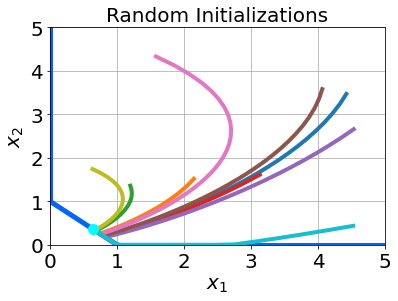

In [84]:
delta = 1e-6

r = [10,2]

tau = [1e-2,1e-2]

plt.figure()
plt.plot([0,1],[1,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([1,5],[0,0],color='xkcd:Bright blue', linewidth=lw+1)
plt.plot([0,0],[1,5],color='xkcd:Bright blue', linewidth=lw+1)

for i in range(10):
    init = 5*np.random.rand(2)
    x_old = [0,0]
    x_new = init
    x_k = []
    while True:
        if np.abs(x_new[0]-x_old[0]) > delta or np.abs(x_new[1]-x_old[1]) > delta:
            x_old = np.copy(x_new)
            x_new[0] = x_old[0] + tau[0]*r[0]*grad_phi_1(x_old[0],x_old[1])
            x_new[1] = x_old[1] + tau[1]*r[1]*grad_phi_2(x_old[0],x_old[1])
            if x_new[0]<0:
                x_new[0] = 0
            if x_new[1]<0:
                x_new[1] = 0
            if x_new[0]+x_new[1]-1<0:
                a = x_new[0]+x_new[1]-1
                x_new[0]=x_new[0]-a/2
                x_new[1]=x_new[1]-a/2
            x_k.append(np.copy(x_new).tolist())
        else:
            break
            
    plt.plot([x[0] for x in x_k], [x[1] for x in x_k], linewidth=lw)

plt.plot([x_new[0]], [x_new[1]], marker='o', markersize=10, color='xkcd:cyan')
plt.xlabel(r'$x_1$', fontsize=fs)
plt.ylabel(r'$x_2$', fontsize=fs)
plt.xlim([0,5])
plt.ylim([0,5])
plt.title('Random Initializations',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.grid()
plt.show()


## Different Implementation 

In [113]:
H=np.array([[1,0,1],[0,1,1]]) # gradient of the three constraints stacked up

r=np.array([2,1]) # set your choice of r
def g(x,r):
    ''' Returns the gradients nabla_i phi_i
    '''
    return np.array([r[0]*(-1*(x[0])+x[1]),r[1]*(-2*x[1]-x[0])])
u=lambda x,r,H_: -la.inv(H_.T@H_)@H_.T@g(x,r) # returns optimal u per Lemma on page 531


initial condition:  [0.64414354 0.38074849]


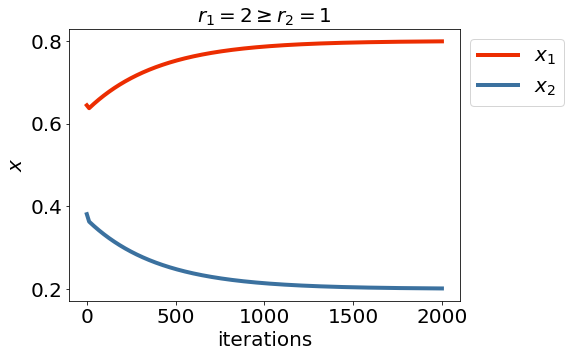

In [112]:
np.random.seed(30)
gamma=1e-3
MAXITER=2000
x_=np.random.rand(2) # initial condition
print("initial condition: ", x_)
x=[x_]
for i in range(MAXITER):
    if np.all(x[-1]>=0) and np.sum(x[-1])>=1:
        # if no constraints are active, use gradient
        x.append(x[-1]+gamma*(g(x[-1],r)))
    elif np.all(x[-1]>=0) and np.sum(x[-1])<1:
        # if h_3 is active, use the corresponding column of H
        # and update using the appropriate u
        H_=H[:,2].reshape(2,1)
        x.append(x[-1]+gamma*(g(x[-1],r)+H_@u(x[-1],r,H_)))
    elif x[-1][0]>=0 and np.sum(x[-1])<1:
        # if h_1 and h_3 active
        H_=np.hstack((H[:,0].reshape(2,1),H[:,2].reshape(2,1)))
        x.append(x[-1]+gamma*(g(x[-1],r)+H_@u(x[-1],r,H_)))
    else:
        # if h_2 and h_3 active
        H_=H[:,1:3]
        x.append(x[-1]+gamma*(g(x[-1],r)+H_@u(x[-1],r,H_)))
x=np.asarray(x)

plt.figure(figsize=(7,5))
plt.tick_params(labelsize=fs)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel(r'$x$', fontsize=fs)
plt.title(r'$r_1=2\geq r_2=1$', fontsize=fs)
plt.plot(x[:,0], label=r'$x_1$', linewidth=lw,color='xkcd:tomato red')
plt.plot(x[:,1], label=r'$x_2$', linewidth=lw,color='xkcd:muted blue')
plt.legend(loc=0, bbox_to_anchor=(1.0,1),fontsize=fs)

initial condition:  [0.64414354 0.38074849]


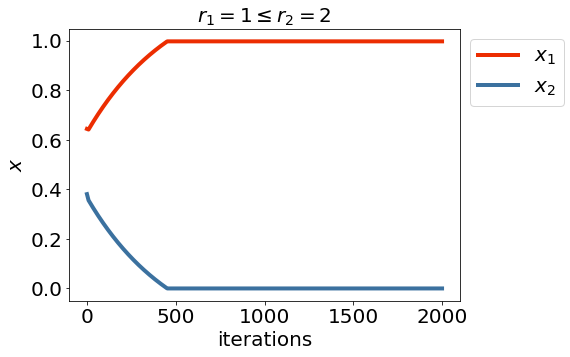

In [115]:
np.random.seed(30)
gamma=1e-3
MAXITER=2000
r=np.array([1,2]) 
x_=np.random.rand(2) # initial condition
print("initial condition: ", x_)
x=[x_]
for i in range(MAXITER):
    if np.all(x[-1]>=0) and np.sum(x[-1])>=1:
        # if no constraints are active, use gradient
        x.append(x[-1]+gamma*(g(x[-1],r)))
    elif np.all(x[-1]>=0) and np.sum(x[-1])<1:
        # if h_3 is active, use the corresponding column of H
        # and update using the appropriate u
        H_=H[:,2].reshape(2,1)
        x.append(x[-1]+gamma*(g(x[-1],r)+H_@u(x[-1],r,H_)))
    elif x[-1][0]>=0 and np.sum(x[-1])<1:
        # if h_1 and h_3 active
        H_=np.hstack((H[:,0].reshape(2,1),H[:,2].reshape(2,1)))
        x.append(x[-1]+gamma*(g(x[-1],r)+H_@u(x[-1],r,H_)))
    else:
        # if h_2 and h_3 active
        H_=H[:,1:3]
        x.append(x[-1]+gamma*(g(x[-1],r)+H_@u(x[-1],r,H_)))
x=np.asarray(x)

plt.figure(figsize=(7,5))
plt.tick_params(labelsize=fs)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel(r'$x$', fontsize=fs)
plt.title(r'$r_1=1\leq r_2=2$', fontsize=fs)
plt.plot(x[:,0], label=r'$x_1$', linewidth=lw,color='xkcd:tomato red')
plt.plot(x[:,1], label=r'$x_2$', linewidth=lw,color='xkcd:muted blue')
plt.legend(loc=0, bbox_to_anchor=(1.0,1),fontsize=fs)